In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision.datasets as datasets
import os
%matplotlib inline

/home/ddsukhoverkhova/.conda/envs/mc_lib_env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['axes.grid'] = True

In [4]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [5]:
Jd = 0.0
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

In [6]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

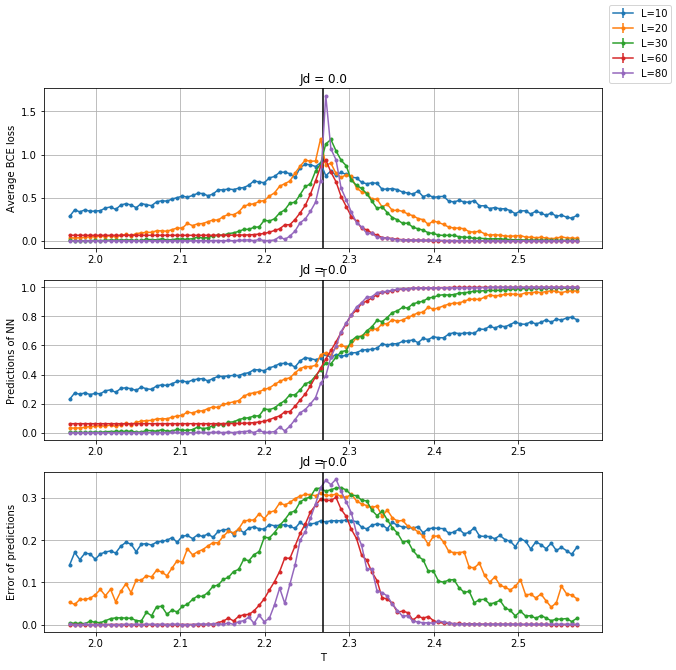

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = 0.0')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

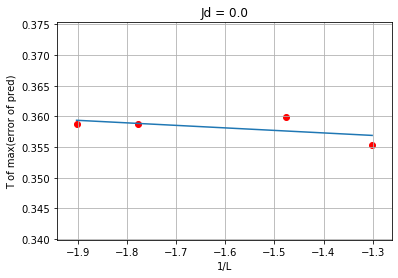

In [8]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = np.array([1/L for L in [20, 30, 60, 80]])
cs = np.array([T[idx_20], T[idx_30], T[idx_60], T[idx_80]])

pl_00 = np.polyfit(np.log10(ls), np.log10(cs), 1)

L_inf = np.arange(2, 1000, 0.01)

plt.scatter(np.log10(ls), np.log10(cs), color='red', label='')
plt.plot(np.log10(ls), np.poly1d(pl_00)(np.log10(ls)))
plt.title('Jd = 0.0')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('images/00_100_max_std.png')

In [9]:
10**pl_00[0]

0.990612818177266

In [10]:
Jd = -0.3
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

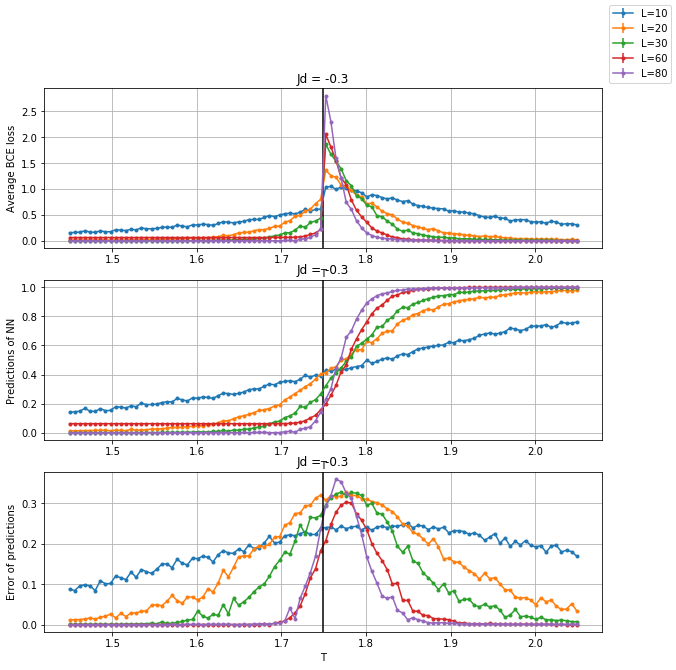

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.3')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

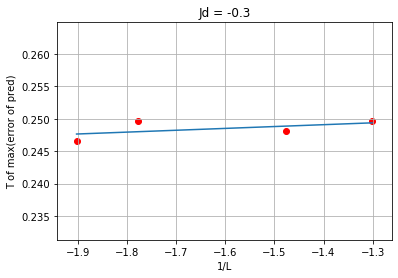

In [12]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = [1/L for L in [20, 30, 60, 80]]
cs = [T[idx_20], T[idx_30], T[idx_60], T[idx_80]]

pl_03 = np.polyfit(np.log10(ls), np.log10(cs), 1)

plt.scatter(np.log10(ls), np.log10(cs), color='red')
plt.plot(np.log10(ls), np.poly1d(pl_03)(np.log10(ls)))
plt.title('Jd = -0.3')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('images/03_100_max_std.png')

In [13]:
10**pl_03[0]

1.0066357749082773

In [14]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

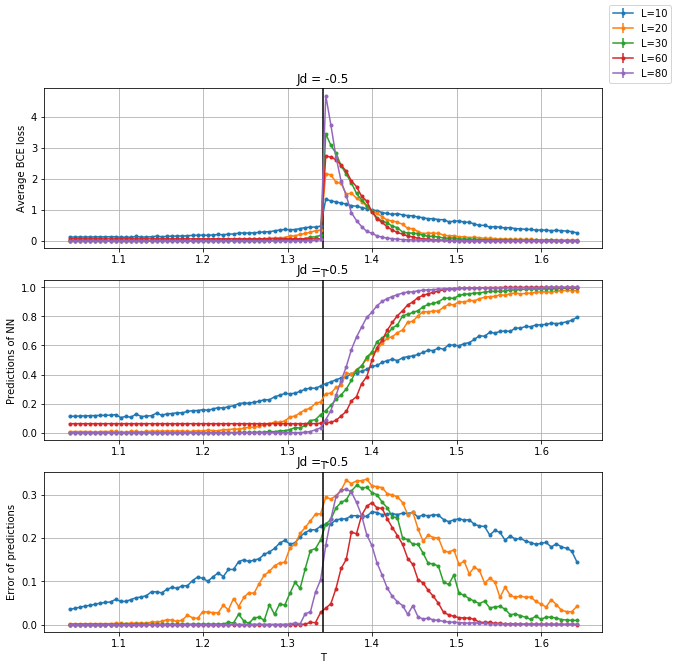

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.5')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

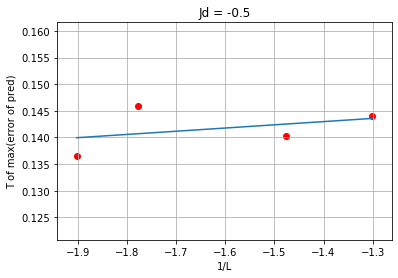

In [16]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = [1/L for L in [20, 30, 60, 80]]
cs = [T[idx_20], T[idx_30], T[idx_60], T[idx_80]]

pl_05 = np.polyfit(np.log10(ls), np.log10(cs), 1)

plt.scatter(np.log10(ls), np.log10(cs), color='red')
plt.plot(np.log10(ls), np.poly1d(pl_05)(np.log10(ls)))
plt.title('Jd = -0.5')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('images/05_100_max_std.png')

In [17]:
10**pl_05[0]

1.0139471714023762

In [18]:
Jd = -0.7
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

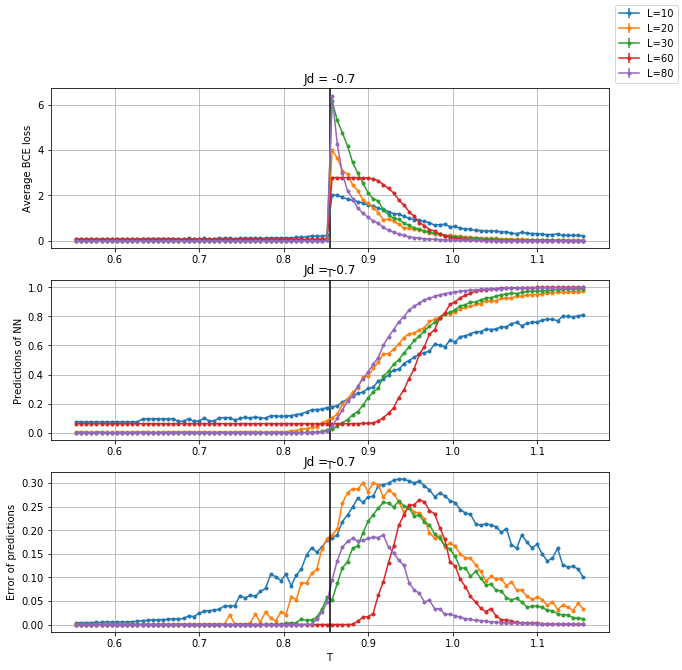

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.7')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

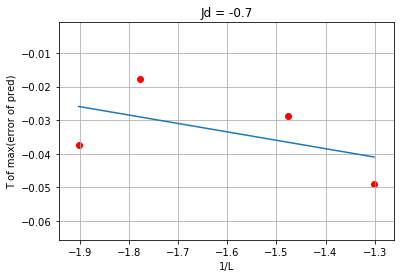

In [20]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = [1/L for L in [20, 30, 60, 80]]
cs = [T[idx_20], T[idx_30], T[idx_60], T[idx_80]]

pl_07 = np.polyfit(np.log10(ls), np.log10(cs), 1)

plt.scatter(np.log10(ls), np.log10(cs), color='red')
plt.plot(np.log10(ls), np.poly1d(pl_07)(np.log10(ls)))
plt.title('Jd = -0.7')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('images/07_100_max_std.png')

In [21]:
10**pl_07[0]

0.9440640238186252

In [22]:
Jd = -0.9
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

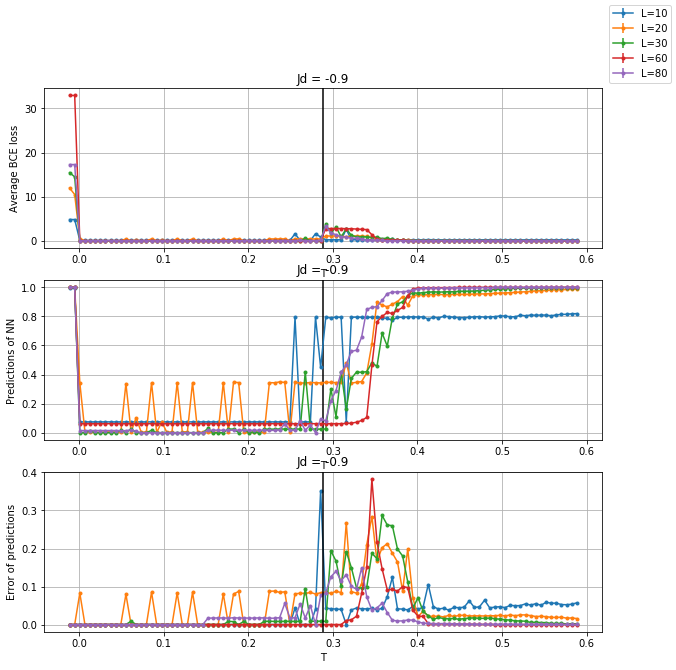

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.9')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

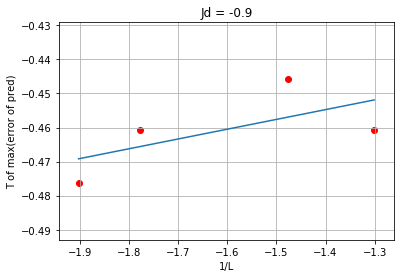

In [24]:
idx_20 = np.argmax(stds_err(outs_20))
idx_30 = np.argmax(stds_err(outs_30))
idx_60 = np.argmax(stds_err(outs_60))
idx_80 = np.argmax(stds_err(outs_80))

ls = [1/L for L in [20, 30, 60, 80]]
cs = [T[idx_20], T[idx_30], T[idx_60], T[idx_80]]

pl_09 = np.polyfit(np.log10(ls), np.log10(cs), 1)

plt.scatter(np.log10(ls), np.log10(cs), color='red')
plt.plot(np.log10(ls), np.poly1d(pl_09)(np.log10(ls)))
plt.title('Jd = -0.9')
plt.xlabel('1/L')
plt.ylabel('T of max(error of pred)')
#plt.xscale('log')
#plt.yscale('log')
plt.savefig('images/09_100_max_std.png')

In [25]:
10**pl_09[0]

1.0683250802784257

In [26]:
10**pl_00[0], 10**pl_03[0], 10**pl_05[0], 10**pl_07[0], 10**pl_09[0]

(0.990612818177266,
 1.0066357749082773,
 1.0139471714023762,
 0.9440640238186252,
 1.0683250802784257)

In [28]:
max_std = [10**(pl_00[1]), 10**(pl_03[1]), 10**(pl_05[1]), 10**(pl_07[1]), 10**(pl_09[1])]
max_std

[2.2468065276285856,
 1.7910869858783842,
 1.4171082626850584,
 0.8443228673317974,
 0.38497990143087085]

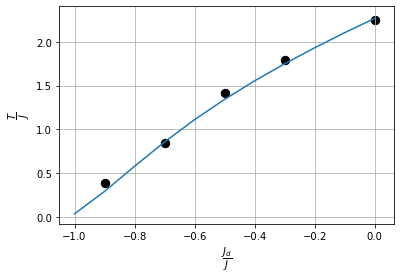

In [33]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
plt.plot(jds, roots)
plt.scatter([0.0, -0.3, -0.5, -0.7, -0.9], max_std, color='black', s=70)
plt.xlabel(r'$\dfrac{J_d}{J}$')
plt.ylabel(r'$\dfrac{T}{J}$')
plt.savefig('images/temps_with_pred.png')